<a href="https://colab.research.google.com/github/AhmadMugiar/WEB_SCRAPPING_KP/blob/main/INDOBERT_SENTIMEN_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from wordcloud import WordCloud
from transformers import DataCollatorWithPadding
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from datasets import Dataset, ClassLabel
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,Trainer, TrainingArguments)
from sklearn.model_selection import train_test_split

#DATA UNDERSTANDING

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DATA_SCRAPPING_GPLAYSTORE_POS/sentimen_APK_PosAja.csv')
data

,reviewId,userName,rate,reviews_text,date
0,cac942b3-2d1b-4d3d-aa85-1290b35a5a01,Pengguna Google,5,baik,2025-08-05 06:57:04
1,a5f76849-26ea-47bb-b4a6-4471a6036ac3,Pengguna Google,1,paket saya dikirim ke orang lain tanpa konfirm...,2025-08-03 15:42:47
2,9fc42b39-9103-4957-9866-0074b7ccafcc,Pengguna Google,2,niat hati bikin SIM dikirim lewat pos eh malah...,2025-08-02 23:31:39
3,284963a3-99db-42fb-9ebf-a3b56d3053bd,Pengguna Google,1,gila lemot banget pengirimannya,2025-08-01 10:22:43
4,20610ea8-98c7-4ac0-b711-fce7e8d051f8,Pengguna Google,1,"Aplikasi rusak. Dimasukkan resi pada aplikasi,...",2025-07-30 11:39:49
...,...,...,...,...,...
6960,1f948e9a-f8e1-4080-8153-41e0cb788b01,Pengguna Google,5,sangat memudahkan bagi para pelanggan pos dala...,2020-03-05 13:36:50
6961,abbc0599-6620-46b0-b8a6-51067e5c2b65,Pengguna Google,5,Perbaiki masalah pin nya orang gampang lupa ti...,2020-03-02 06:41:33
6962,b57cb510-9bce-4f88-ad13-d5b9a477951e,Pengguna Google,5,Kembali nya Sang Legenda...,2020-03-02 05:12:12
6963,304143ba-b09a-4fc0-a613-f69ab0661e89,Pengguna Google,5,lebih maju pos indonesia,2020-03-02 03:49:40


In [3]:
# Eksplorasi data
print("\n Informasi Dataset:")
print(f"- Jumlah baris dan kolom: {data.shape}")
print(f"- Kolom yang tersedia: {list(data.columns)}")

print("\n Tipe Data:")
print(data.dtypes)

print("\n Data Kosong:")
print(data.isnull().sum())

print("\n Statistik Deskriptif:")
data.describe()


 Informasi Dataset:
- Jumlah baris dan kolom: (6965, 5)
- Kolom yang tersedia: ['reviewId', 'userName', 'rate', 'reviews_text', 'date']

 Tipe Data:
reviewId        object
userName        object
rate             int64
reviews_text    object
date            object
dtype: object

 Data Kosong:
reviewId        0
userName        0
rate            0
reviews_text    0
date            0
dtype: int64

 Statistik Deskriptif:


,rate
count,6965.000000
mean,3.940991
std,1.657955
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
# Analisis distribusi rating
print("\n Distribusi Rating:")
print(data['rate'].value_counts().sort_index())


 Distribusi Rating:
rate
1    1477
2     220
3     267
4     274
5    4727
Name: count, dtype: int64


/tmp/ipython-input-2759627807.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


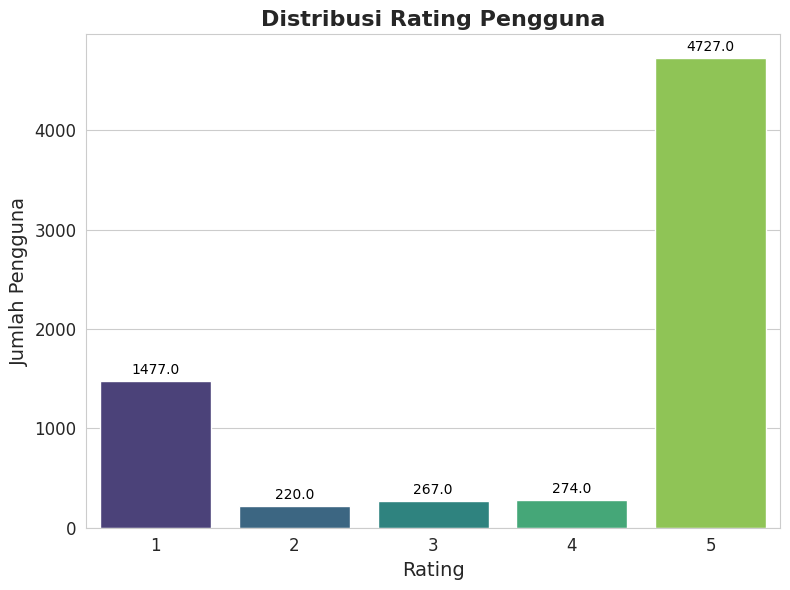

In [5]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# urutkan rating berdasarkan nilai unik
order = sorted(data['rate'].unique())

ax = sns.countplot(
    x='rate',
    data=data,
    order=order,
    palette='viridis'
)

# tambahin angka di atas batang
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points',
        fontsize=10, color='black'
    )

plt.title('Distribusi Rating Pengguna', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


WordCloud - Kata yang Sering Muncul:


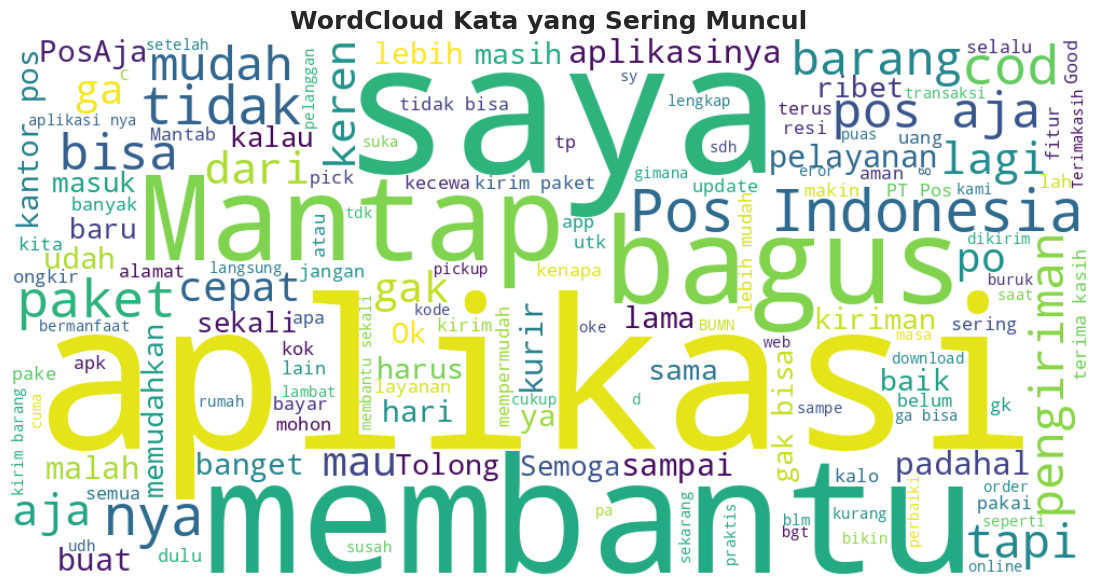

In [6]:
print("\nWordCloud - Kata yang Sering Muncul:")

# gabung semua review jadi satu string
text_combined = " ".join(data['reviews_text'].astype(str).tolist())

from wordcloud import STOPWORDS
extra_stopwords = {'dan', 'yang', 'di', 'ke', 'pada', 'untuk', 'sudah', 'saja',
                   'dengan', 'ada', 'ini', 'itu', 'juga', 'karena', 'jadi','sangat','yg'}
stopwords_custom = STOPWORDS.union(extra_stopwords)

wordcloud = WordCloud(
    width=1000, height=500,
    background_color='white',
    colormap='viridis',
    stopwords=stopwords_custom,
    max_words=150,
    contour_color='steelblue',
    contour_width=2
).generate(text_combined)

# tampilkan
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Kata yang Sering Muncul', fontsize=18, fontweight='bold')
plt.show()

#DATA PREPARATION

In [7]:
# Pembersihan teks
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Konversi ke huruf kecil
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Hapus URL
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Hapus karakter non-alfabet
        text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
        return text
    else:
        return ""

data['clean_ulasan'] = data['reviews_text'].apply(clean_text)

In [8]:
# Labeling sentimen berdasarkan rating
def label_sentiment(rating):
    if rating >= 4:
        return 'positif'
    elif rating == 3:
        return 'netral'
    else:
        return 'negatif'

data['label'] = data['rate'].apply(label_sentiment)

print("Distribusi sentimen sebelum preprocessing:")
print(data['label'].value_counts())

Distribusi sentimen sebelum preprocessing:
label
positif    5001
negatif    1697
netral      267
Name: count, dtype: int64


In [9]:
# Filter data dengan ulasan yang terlalu pendek
data_filtered = data[data['clean_ulasan'].str.len() > 5].copy()
print(f"Data setelah filtering: {data_filtered.shape[0]} dari {data.shape[0]} data")

Data setelah filtering: 6303 dari 6965 data


In [10]:
# Penanganan imbalanced data (oversampling untuk kelas minoritas)
print("Menangani ketidakseimbangan kelas...")
print("Distribusi sebelum oversampling:")
print(data_filtered['label'].value_counts())

# Memisahkan data ke dalam tiga subset berdasarkan label
netral_df = data_filtered[data_filtered['label'] == 'netral']
negatif_df = data_filtered[data_filtered['label'] == 'negatif']
positif_df = data_filtered[data_filtered['label'] == 'positif']

# Menentukan jumlah target sample untuk setiap kelas
target_samples = max(len(negatif_df), len(positif_df))

# Oversampling data netral agar jumlahnya setara dengan kelas terbanyak
oversampled_netral = netral_df.sample(n=target_samples, replace=True, random_state=42)

# Menggabungkan data negatif, positif, dan netral (yang sudah di-oversample)
data_balanced = pd.concat([negatif_df, positif_df, oversampled_netral]).reset_index(drop=True)

print("Distribusi setelah oversampling:")
print(data_balanced['label'].value_counts())

Menangani ketidakseimbangan kelas...
Distribusi sebelum oversampling:
label
positif    4383
negatif    1667
netral      253
Name: count, dtype: int64
Distribusi setelah oversampling:
label
positif    4383
netral     4383
negatif    1667
Name: count, dtype: int64


In [11]:
# Encoding label
label2id = {'negatif': 0, 'netral': 1, 'positif': 2}
id2label = {0: 'negatif', 1: 'netral', 2: 'positif'}
data_balanced['label_id'] = data_balanced['label'].map(label2id).astype('int64')

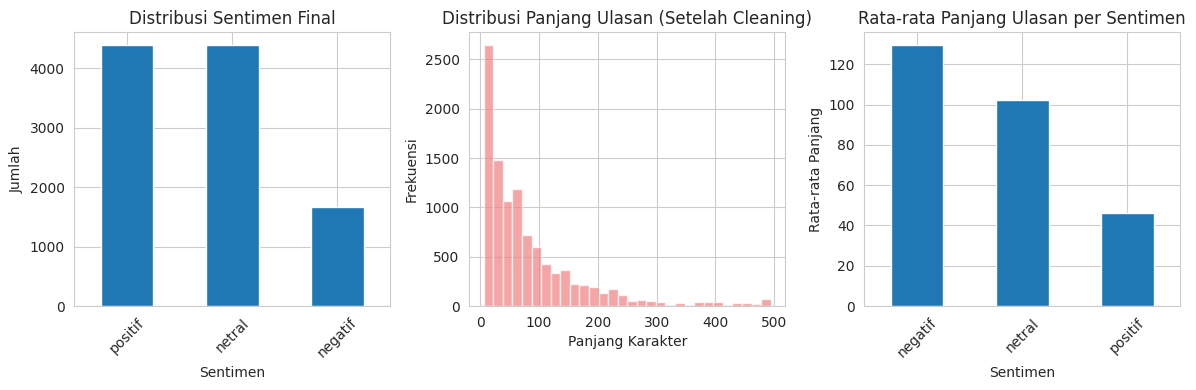

In [12]:
# Visualisasi hasil preprocessing
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
data_balanced['label'].value_counts().plot(kind='bar', title='Distribusi Sentimen Final')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
data_balanced['panjang_ulasan'] = data_balanced['clean_ulasan'].str.len()
plt.hist(data_balanced['panjang_ulasan'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Distribusi Panjang Ulasan (Setelah Cleaning)')
plt.xlabel('Panjang Karakter')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
sample_lengths = data_balanced.groupby('label')['panjang_ulasan'].mean()
sample_lengths.plot(kind='bar', title='Rata-rata Panjang Ulasan per Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Rata-rata Panjang')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#MODELING

In [13]:
# Persiapan tokenizer dan model
print("Memuat tokenizer dan model IndoBERT...")
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

Memuat tokenizer dan model IndoBERT...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
# Split dataset data latih (80%) dan data uji (20%).
train_df, test_df = train_test_split(data_balanced, test_size=0.2, stratify=data_balanced['label_id'], random_state=42)

In [15]:
# Konversi DataFrame ke dataset HuggingFace
train_dataset = Dataset.from_pandas(train_df[['clean_ulasan', 'label_id']])
test_dataset = Dataset.from_pandas(test_df[['clean_ulasan', 'label_id']])

# Ganti nama kolom agar sesuai dengan standar HuggingFace (text dan label)
train_dataset = train_dataset.rename_columns({'clean_ulasan': 'text', 'label_id': 'label'})
test_dataset = test_dataset.rename_columns({'clean_ulasan': 'text', 'label_id': 'label'})

# Konversi label menjadi ClassLabel agar dikenali sebagai kelas kategori
features = train_dataset.features.copy()
features['label'] = ClassLabel(names=['negatif', 'netral', 'positif'])
train_dataset = train_dataset.cast(features)
test_dataset = test_dataset.cast(features)

Casting the dataset:   0%|          | 0/8346 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2087 [00:00<?, ? examples/s]

In [16]:
# Tokenisasi
def tokenize_function(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=512)

print("Melakukan tokenisasi...")
# Tokenize datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Melakukan tokenisasi...


Map:   0%|          | 0/8346 [00:00<?, ? examples/s]

Map:   0%|          | 0/2087 [00:00<?, ? examples/s]

In [17]:
# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [18]:
# Fungsi evaluasi
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy}

In [19]:
import transformers
print("Versi Transformers:", transformers.__version__)
print("TrainingArguments path:", transformers.TrainingArguments.__module__)


Versi Transformers: 4.55.2
TrainingArguments path: transformers.training_args


In [20]:
# Konfigurasi training
print("Konfigurasi training...")
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_total_limit=1,
    report_to=None,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Training model
trainer.train()

Konfigurasi training...


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ahmadmugiarsujana17 (ahmadmugiarsujana17-universitas-logistik-dan-bisnis-inte) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy
1,0.242900,0.246834,0.941543
2,0.047100,0.196476,0.957834
3,0.063500,0.187489,0.961188


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=3132, training_loss=0.19645890581597292, metrics={'train_runtime': 27559.747, 'train_samples_per_second': 0.908, 'train_steps_per_second': 0.114, 'total_flos': 1736991533110428.0, 'train_loss': 0.19645890581597292, 'epoch': 3.0})

#EVALUASI

In [21]:
# Prediksi pada test set
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = np.argmax(predictions.predictions, axis=1)

# Evaluasi model
print("Hasil Evaluasi Model:")
accuracy = accuracy_score(y_true, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Hasil Evaluasi Model:
Akurasi Model: 96.12%


In [22]:
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred,
    labels=[0, 1, 2],
    target_names=["negatif", "netral", "positif"],
    zero_division=0  # biar gak error kalau ada nilai precision/recall 0
))

Classification Report:
              precision    recall  f1-score   support

     negatif       0.91      0.88      0.89       333
      netral       0.97      1.00      0.99       877
     positif       0.97      0.96      0.96       877

    accuracy                           0.96      2087
   macro avg       0.95      0.94      0.95      2087
weighted avg       0.96      0.96      0.96      2087



Confusion Matrix:


<Figure size 800x600 with 0 Axes>

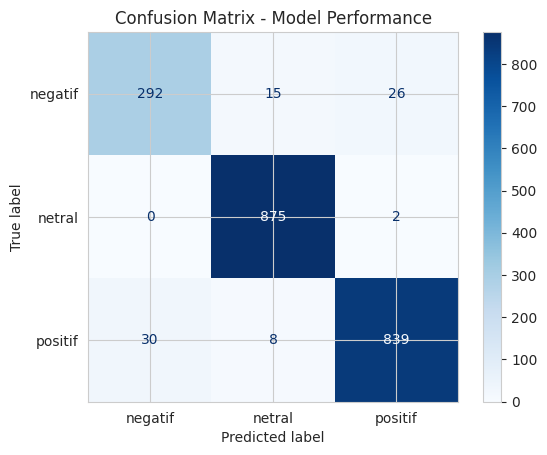

In [23]:
# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negatif", "netral", "positif"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Model Performance")
plt.show()

In [24]:
# Analisis per kelas
print(" Analisis Performa per Kelas:")
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None)
results_df = pd.DataFrame({
    'Kelas': ['negatif', 'netral', 'positif'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})
print(results_df)

 Analisis Performa per Kelas:
     Kelas  Precision    Recall  F1-Score  Support
0  negatif   0.906832  0.876877  0.891603      333
1   netral   0.974388  0.997719  0.985915      877
2  positif   0.967705  0.956670  0.962156      877


In [25]:
# Analisis kesalahan prediksi
print("Analisis Kesalahan Prediksi:")
test_df = test_dataset.to_pandas()
test_df['y_true'] = y_true
test_df['y_pred'] = y_pred
test_df['true_label'] = test_df['y_true'].map(id2label)
test_df['pred_label'] = test_df['y_pred'].map(id2label)

# Contoh kesalahan prediksi
wrong_predictions = test_df[test_df['y_true'] != test_df['y_pred']]
print(f"Jumlah kesalahan prediksi: {len(wrong_predictions)}")

if len(wrong_predictions) > 0:
    print("\nContoh kesalahan prediksi:")
    for i, row in wrong_predictions.head(5).iterrows():
        print(f"Teks: {row['text'][:100]}...")
        print(f"Label True: {row['true_label']}, Prediksi: {row['pred_label']}")
        print("-" * 80)


Analisis Kesalahan Prediksi:
Jumlah kesalahan prediksi: 81

Contoh kesalahan prediksi:
Teks: mantap...
Label True: negatif, Prediksi: positif
--------------------------------------------------------------------------------
Teks: saya salah satu pedagang si oren tolong adain pembayaran cod nya juga dong supaya saya kirim paketny...
Label True: positif, Prediksi: negatif
--------------------------------------------------------------------------------
Teks: paket jumbo ongkir superrrr mahaalllll bgt dan pengiriman sangat leletttttt...
Label True: negatif, Prediksi: positif
--------------------------------------------------------------------------------
Teks: tolong dikembangkan lagi fitur buat cetak invoice dan label pengiriman supaya bisa langsung dari apl...
Label True: positif, Prediksi: negatif
--------------------------------------------------------------------------------
Teks: mohon bantuannya dlu sya pnh daftar qposin aja tpi sya lupa krna jarang pake trus aplikasinya terhap...
La

#INFERENCE

In [26]:
# Setup model untuk inference
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_sentiment(text, return_confidence=False):

    # Preprocessing teks
    cleaned_text = clean_text(text)

    # Tokenisasi
    inputs = tokenizer(cleaned_text, return_tensors="pt",
                      truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(outputs.logits, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    predicted_label = id2label[predicted_class]

    if return_confidence:
        return predicted_label, confidence
    else:
        return predicted_label

def predict_with_probabilities(text):

    cleaned_text = clean_text(text)
    inputs = tokenizer(cleaned_text, return_tensors="pt",
                      truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    prob_dict = {}
    for i, label in id2label.items():
        prob_dict[label] = probabilities[0][i].item()

    return prob_dict


In [27]:
test_sentences = [
    "Aplikasinya sangat bagus, saya suka!",
    "Buruk sekali, bikin kesel.",
    "Lumayan.",
    "Kenapa aplikasi ini lag banget ya?",
    "CS nya ramah banget, mantap.",
    "Bayar paket gagal terus!",
]

for text in test_sentences:
    sentiment, confidence = predict_sentiment(text, return_confidence=True)
    print(f"Teks: {text}")
    print(f"Prediksi: {sentiment} (Confidence: {confidence:.2f})")
    print("-" * 40)


Teks: Aplikasinya sangat bagus, saya suka!
Prediksi: positif (Confidence: 1.00)
----------------------------------------
Teks: Buruk sekali, bikin kesel.
Prediksi: negatif (Confidence: 1.00)
----------------------------------------
Teks: Lumayan.
Prediksi: positif (Confidence: 1.00)
----------------------------------------
Teks: Kenapa aplikasi ini lag banget ya?
Prediksi: negatif (Confidence: 1.00)
----------------------------------------
Teks: CS nya ramah banget, mantap.
Prediksi: positif (Confidence: 1.00)
----------------------------------------
Teks: Bayar paket gagal terus!
Prediksi: negatif (Confidence: 1.00)
----------------------------------------


In [28]:
# Interface interaktif
print("Interface Interaktif:")
print("Silakan masukkan ulasan untuk diprediksi sentimennya!")
print("Ketik 'stop' untuk keluar")

while True:
    user_input = input("\nMasukkan ulasan: ")
    if user_input.lower() == 'stop':
        break

    if user_input.strip():
        sentiment, confidence = predict_sentiment(user_input, return_confidence=True)
        print(f"Sentimen: {sentiment}")
        print(f"Confidence: {confidence:.2f}")
    else:
        print("Silakan masukkan teks yang valid!")

Interface Interaktif:
Silakan masukkan ulasan untuk diprediksi sentimennya!
Ketik 'stop' untuk keluar

Masukkan ulasan: lumayan
Sentimen: positif
Confidence: 1.00

Masukkan ulasan: bagus
Sentimen: positif
Confidence: 1.00

Masukkan ulasan: jlk
Sentimen: positif
Confidence: 1.00

Masukkan ulasan: jelek
Sentimen: negatif
Confidence: 1.00

Masukkan ulasan: saya salah satu pedagang si oren tolong adain pembayaran cod nya juga dong supaya saya kirim paketny...
Sentimen: positif
Confidence: 0.84

Masukkan ulasan: stop


In [36]:
import joblib

# Simpan model menggunakan joblib ke Google Drive
model_filename_drive = "/content/drive/MyDrive/sentiment_model.joblib" # Ganti dengan path yang Anda inginkan di Google Drive
joblib.dump(model, model_filename_drive)

print(f"Model berhasil disimpan ke: {model_filename_drive}")

Model berhasil disimpan ke: /content/drive/MyDrive/sentiment_model.joblib


In [34]:
import joblib
import torch

# Muat model dari file joblib
model_filename = "sentiment_model.joblib"
loaded_model = joblib.load(model_filename)

# Pindahkan model ke device yang sesuai
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)
loaded_model.eval()

print(f"Model berhasil dimuat dari: {model_filename}")

# Gunakan fungsi predict_sentiment yang sudah ada dengan model yang dimuat
def predict_sentiment_loaded(text, model, tokenizer, id2label, return_confidence=False):
    # Preprocessing teks
    cleaned_text = clean_text(text) # Asumsikan clean_text sudah didefinisikan sebelumnya

    # Tokenisasi
    inputs = tokenizer(cleaned_text, return_tensors="pt",
                      truncation=True, padding=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    # Prediksi
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(outputs.logits, dim=1).item()
        confidence = probabilities[0][predicted_class].item()

    predicted_label = id2label[predicted_class]

    if return_confidence:
        return predicted_label, confidence
    else:
        return predicted_label

# Contoh penggunaan dengan teks baru
test_new_sentences = [
    "Pengiriman cepat dan kurirnya ramah.",
    "Aplikasi sering error saat login.",
    "Fiturnya biasa saja, tidak ada yang istimewa.",
    "sebenernya aplikasinya bagus cuman banyak fitur yang jelek"
]

for text in test_new_sentences:
    sentiment, confidence = predict_sentiment_loaded(text, loaded_model, tokenizer, id2label, return_confidence=True)
    print(f"Teks: {text}")
    print(f"Prediksi: {sentiment} (Confidence: {confidence:.2f})")
    print("-" * 40)

Model berhasil dimuat dari: sentiment_model.joblib
Teks: Pengiriman cepat dan kurirnya ramah.
Prediksi: positif (Confidence: 1.00)
----------------------------------------
Teks: Aplikasi sering error saat login.
Prediksi: negatif (Confidence: 0.99)
----------------------------------------
Teks: Fiturnya biasa saja, tidak ada yang istimewa.
Prediksi: positif (Confidence: 1.00)
----------------------------------------
Teks: sebenernya aplikasinya bagus cuman banyak fitur yang jelek
Prediksi: netral (Confidence: 0.50)
----------------------------------------
